# ***ANALYZING GAME SALES 2010 - 2020***

In [3]:
#libraries used
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.api import qqplot

import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
from plotly.tools import FigureFactory as ff
from plotly.offline import init_notebook_mode,iplot

from IPython.display import Image
#from pandas_profiling import ProfileReport

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [4]:
#color palletes
pal_hls = sns.color_palette("hls", 8)              
pal_husl = sns.color_palette("husl", 8)
pal_set2 = sns.color_palette("Set2")
pal_paired = sns.color_palette("Paired")
pal_rocket = sns.color_palette("rocket", as_cmap=True)
pal_mako = sns.color_palette("mako", as_cmap=True)
pal_flare = sns.color_palette("flare", as_cmap=True)
pal_crest = sns.color_palette("crest", as_cmap=True)
pal_magma = sns.color_palette("magma", as_cmap=True)
pal_verdis = sns.color_palette("viridis", as_cmap=True)
pal_cubehelix = sns.color_palette("cubehelix", as_cmap=True)
pal_spectral = sns.color_palette("Spectral", as_cmap=True)
pal_coolwarm = sns.color_palette("coolwarm", as_cmap=True)

***@Author: Long Bui***

The last decade witnessed the exponential growth of tech industry, espeically gaming field when numerous types of genres of games, platforms including steam, epic,.. or even new type of entertaining products based on game such as streams, or multi-media gaming celebrities,... Through this project, we want to analyze the growth rate of gaming product, concentrating in North America-the biggest gaming market in the world during 2010-2020 period. We then estimating the growth rate of gaming industry globally and in North America in the next decade.


***1) Importing data***

Let's look at the raw database that I collect from Video Game Sales by Gregory Smith. The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [5]:
#read the full data
data = pd.read_csv('vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In this data set there are 11 columns. Their names and data types as follows:

**Rank**- Ranking of overall sales, integer

**Name** - The games name, object

**Platform** - Platform of the games release (i.e. PC,PS4, etc.), object

**Year** - Year of the game's release, float

**Genre** - Genre of the game ,object

**Publisher** - Publisher of the game

**NA_Sales** - Sales in North America (in millions)

**EU_Sales** - Sales in Europe (in millions)

**JP_Sales** - Sales in Japan (in millions)

**Other_Sales** - Sales in the rest of the world (in millions)

**Global_Sales** - Total worldwide sales.

In this project, I want to focus on the game that being produced during the last decade. Hence, we we will generate a new dataset including only games publishing from 2010 to 2019.

**Pros**: Recent games possess accurately reflex how the current gaming industry's flows and trends.

**Cons**: Since the data about recent game is new, it has not been considerately examined.

In [6]:
#2010-2020 dataset
recent_game = data[data['Year']>2010].sort_values(['Global_Sales','NA_Sales'], ascending=False)
print(recent_game.head())

    Rank                            Name Platform    Year         Genre  \
16    17              Grand Theft Auto V      PS3  2013.0        Action   
23    24              Grand Theft Auto V     X360  2013.0        Action   
29    30  Call of Duty: Modern Warfare 3     X360  2011.0       Shooter   
32    33             Pokemon X/Pokemon Y      3DS  2013.0  Role-Playing   
33    34       Call of Duty: Black Ops 3      PS4  2015.0       Shooter   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16  Take-Two Interactive      7.01      9.27      0.97         4.14   
23  Take-Two Interactive      9.63      5.31      0.06         1.38   
29            Activision      9.03      4.28      0.13         1.32   
32              Nintendo      5.17      4.05      4.34         0.79   
33            Activision      5.77      5.81      0.35         2.31   

    Global_Sales  
16         21.40  
23         16.38  
29         14.76  
32         14.35  
33         14.24  


**2) Data cleaning**

Let's see if the dataset has any null values to drop or there are invalid data types for any column to drop.

In [7]:
#information of the dataset
print(recent_game.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 16 to 16589
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3886 non-null   int64  
 1   Name          3886 non-null   object 
 2   Platform      3886 non-null   object 
 3   Year          3886 non-null   float64
 4   Genre         3886 non-null   object 
 5   Publisher     3877 non-null   object 
 6   NA_Sales      3886 non-null   float64
 7   EU_Sales      3886 non-null   float64
 8   JP_Sales      3886 non-null   float64
 9   Other_Sales   3886 non-null   float64
 10  Global_Sales  3886 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 364.3+ KB
None


Notice that the Year column is in type "float" while it should be categorical datatype since the Year column represents only the year that the Game being published while using float for year column may create misunderstandings (for example, 2013.5 may be misunderstood to 06-2013). Moreover, let's adjust our dataframe a little bit to make it more eye-appealing but we only observe 20 best gaming products in the last decade (ranking through global scales).

In [8]:
recent_game['Year'] = recent_game['Year'].astype('int')            #convert year column of recent_game to int
recent_game['Rank'] = np.arange(1,len(recent_game['Rank'])+1,1)    #re-arange games Ranking

#set_blackground
cm = sns.light_palette("lightblue", as_cmap=True)

#Applying currency formatting+find max/min
recent_game.head(20)\
    .style.background_gradient(cmap=cm)\
    .set_properties(**{'color': 'blue',
                        'border-color': 'white'})\
    .format({'Global_Sales':'${:.2f}', 'NA_Sales':'$ {:.2f}', 'EU_Sales':'$ {:.2f}'\
    ,'JP_Sales':'$ {:.2f}' , 'Other_Sales':'$ {:.2f}'}, precision=1)\
    .highlight_max(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], color='lightgreen')\
    .highlight_min(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], color='red')\
    .text_gradient(cmap='PiYG',subset='Rank')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,$ 7.01,$ 9.27,$ 0.97,$ 4.14,$21.40
23,2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,$ 9.63,$ 5.31,$ 0.06,$ 1.38,$16.38
29,3,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,$ 9.03,$ 4.28,$ 0.13,$ 1.32,$14.76
32,4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,$ 5.17,$ 4.05,$ 4.34,$ 0.79,$14.35
33,5,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,$ 5.77,$ 5.81,$ 0.35,$ 2.31,$14.24
34,6,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,$ 4.99,$ 5.88,$ 0.65,$ 2.52,$14.03
35,7,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,$ 8.25,$ 4.30,$ 0.07,$ 1.12,$13.73
37,8,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,$ 5.54,$ 5.82,$ 0.49,$ 1.62,$13.46
42,9,Mario Kart 7,3DS,2011,Racing,Nintendo,$ 4.74,$ 3.91,$ 2.67,$ 0.89,$12.21
44,10,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,$ 3.80,$ 5.81,$ 0.36,$ 2.02,$11.98


Through the dataframe above, we can easily understand that how influential GTA5 in the game-industry in the last decade. It not only distinct itself in North America market but also topped up in Europe market and even in the global scale. However, in JP_Sales, it was beaten by the old-day traditional Pokemon game and Pokemon was also the most profitable product in Japan market. 

Such a memorable data that makes me remember the Pokemon mod I installed in GTA5!

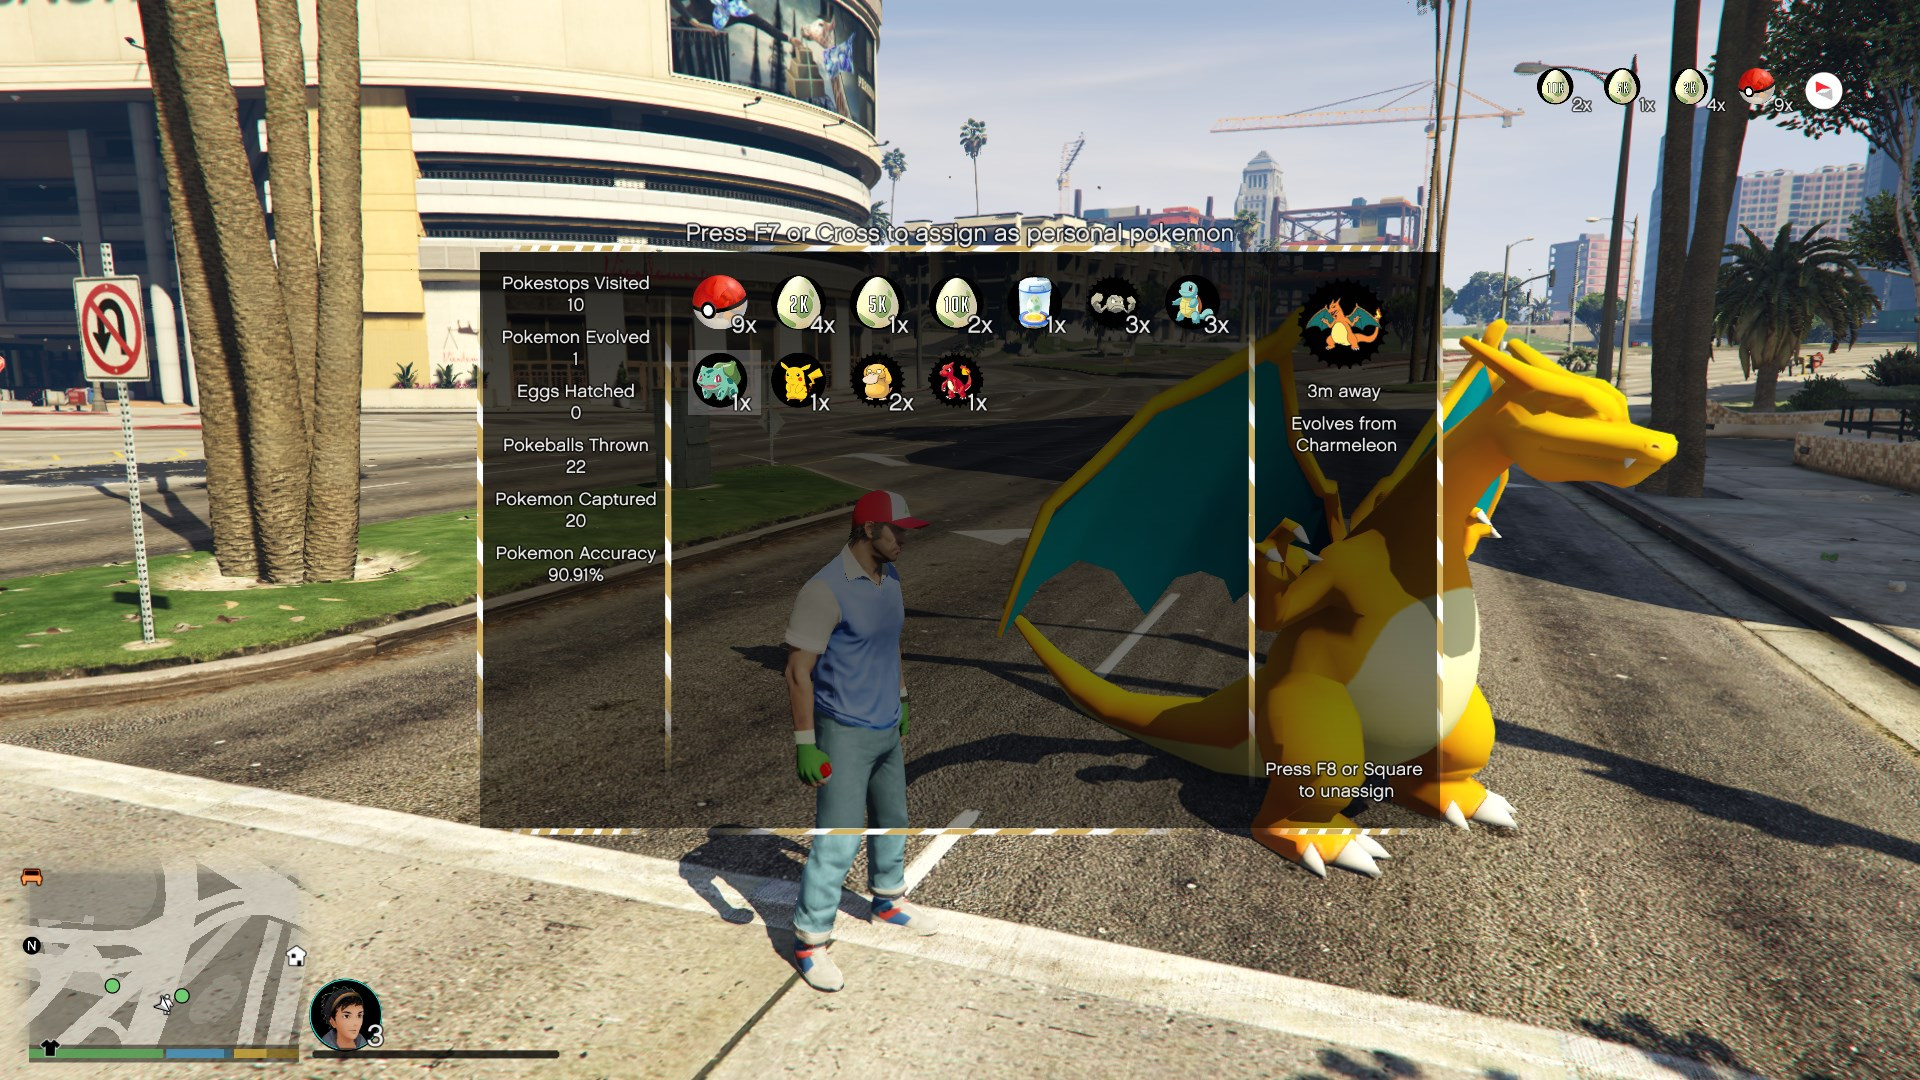

In [9]:
Image("/kaggle/input/gta5poke/ga5poke.jpg")

**3) Descriptive Analytics**

***a) General Summary***

The ProfileReport method from pandas-profiling package (an extended package of pandas) below will include entire summary of the recent_game dataset.

In [9]:
vgames_profile = ProfileReport(recent_game, title='Video Games Profile Report')
vgames_profile

NameError: name 'ProfileReport' is not defined

Let's investigate further about 2010s gaming industry.

**b) Market summary**

First, let's observe the datasets summary.

In [10]:
#summarize the dataset
print(recent_game.describe())

              Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count  3886.000000  3886.000000  3886.000000  3886.000000  3886.000000   
mean   1943.500000  2012.980957     0.208057     0.170391     0.061580   
std    1121.935901     1.716195     0.571667     0.482335     0.220195   
min       1.000000  2011.000000     0.000000     0.000000     0.000000   
25%     972.250000  2011.000000     0.000000     0.000000     0.000000   
50%    1943.500000  2013.000000     0.040000     0.030000     0.010000   
75%    2914.750000  2014.000000     0.170000     0.140000     0.050000   
max    3886.000000  2020.000000     9.630000     9.270000     4.360000   

       Other_Sales  Global_Sales  
count  3886.000000   3886.000000  
mean      0.053996      0.494184  
std       0.161790      1.224063  
min       0.000000      0.010000  
25%       0.000000      0.040000  
50%       0.010000      0.130000  
75%       0.040000      0.420000  
max       4.140000     21.400000  


We can easily the mean year of products is 2012 and 75% of the game released before 2014 which indicates that there exists a mass trends of producting games in the early 2010s while it starts to decline in the late 2010s. Now let's observe how NA, EU, JP, and other markets taking place on the global sales.

Total NA market revenue is: 808.51
Total EU market revenue is: 662.14
Total JP market revenue is: 239.3
Total Other market revenue is: 209.83
Total Global market revenue is: 1920.4


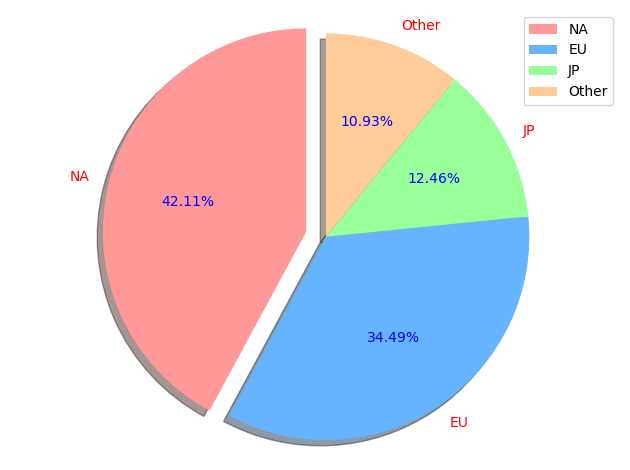

In [11]:
#sales
NA_Sales = recent_game['NA_Sales'].sum()
EU_Sales = recent_game['EU_Sales'].sum()
JP_Sales = recent_game['JP_Sales'].sum()
Other_Sales = recent_game['Other_Sales'].sum()
Glob_Sales = recent_game['Global_Sales'].sum()
tot_sales_sr=pd.Series(data=[NA_Sales, EU_Sales, JP_Sales, Other_Sales], index=['NA','EU','JP','Other'])

print('Total NA market revenue is:', round(NA_Sales,2))
print('Total EU market revenue is:', round(EU_Sales,2))
print('Total JP market revenue is:', round(JP_Sales,2))
print('Total Other market revenue is:', round(Other_Sales,2))
print('Total Global market revenue is:', round(Glob_Sales,2))

#colors & labels + explode the 1st slice
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['NA','EU','JP','Other']
explode = (0.1, 0, 0, 0)

#plot
fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(tot_sales_sr, labels=labels, colors = colors,\
                                    shadow=True, explode=explode, autopct='%.2f%%', startangle=90)
for text in texts:
    text.set_color('red')
for autotext in autotexts:
    autotext.set_color('blue')

plt.legend(patches, labels, loc="best")
ax1.axis('equal')
plt.tight_layout()
plt.show()

From the pie chart above, we can easily observe that North America market has dominantly occupied a large part of the gaming industry. Although the entire industry may demonstrates such an overal characteristics, a single observation may not possess such. In other words, let's see whether each single product's relations between NA_Sales and Global Sales.

LinregressResult(slope=1.9844248380580893, intercept=0.08131051831746128, rvalue=0.9267734007726401, pvalue=0.0, stderr=0.012905393068339264, intercept_stderr=0.007850112112269136)


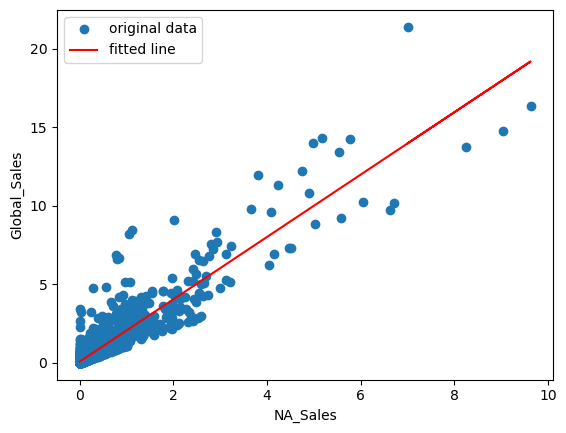

In [12]:
na_glob_rel = stats.linregress(recent_game['NA_Sales'], recent_game['Global_Sales'])
print(na_glob_rel)

plt.plot(recent_game['NA_Sales'], recent_game['Global_Sales'], 'o', label='original data')
plt.plot(recent_game['NA_Sales'], na_glob_rel.intercept + na_glob_rel.slope*recent_game['NA_Sales'], 'r', label='fitted line')
plt.legend()
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.show()

As we could see above, the linear regression apporximately fit for most of the variables. Hence, approximately 40% of the global profit of the game product may come from North America's market.

**Let's see how many games, platforms, and publishers are included in this dataset.**

In [14]:
print("Number of games in the dataset:", len(recent_game['Name'].unique()))
print("Number of platforms in the dataset:", len(recent_game['Platform'].unique()))
print("Number of publishers in the dataset:", len(recent_game['Publisher'].unique()))
print("Number of games' genres in the dataset:", len(recent_game['Genre'].unique()))

Number of games in the dataset: 2341
Number of platforms in the dataset: 12
Number of publishers in the dataset: 223
Number of games' genres in the dataset: 12


Let's examine games' genre first.

Text(0.5, 0, 'Genre')

<Figure size 1500x1000 with 0 Axes>

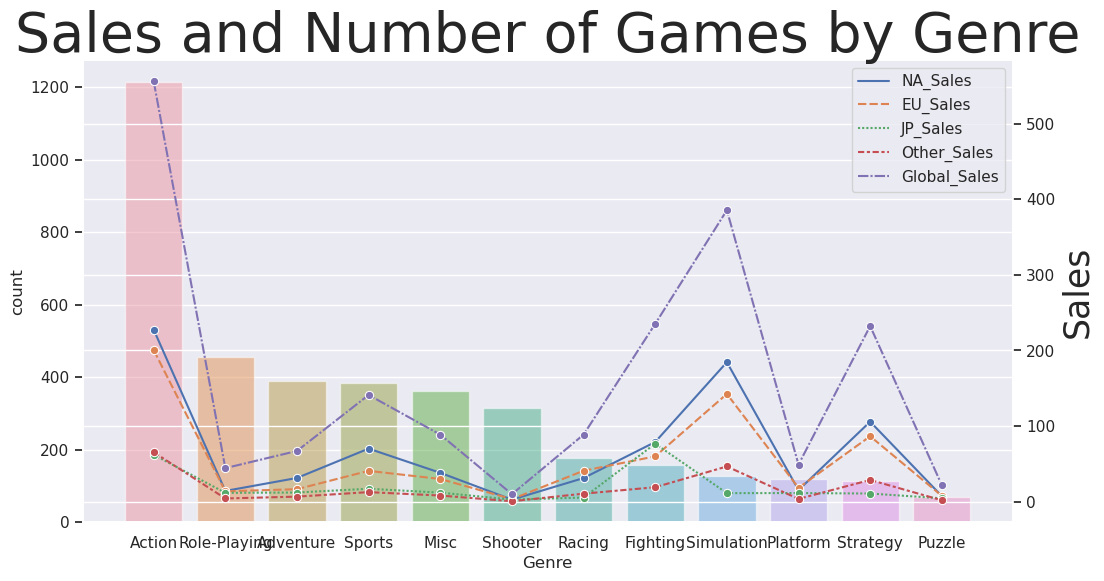

In [15]:
#theme
plt.figure(figsize=(15,10))
sns.color_palette("Paired")
sns.set_theme('notebook')

#count + line plot
fig, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(data = recent_game, x='Genre', order=recent_game['Genre'].value_counts().index,\
              alpha=0.5, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = recent_game[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales',\
                                'Global_Sales']].groupby('Genre').sum(), marker='o', sort = False, ax=ax2)

#additional figures
plt.xticks()
plt.title('Sales and Number of Games by Genre', fontsize=40)
plt.ylabel('Sales', fontsize=25)
plt.xlabel('Genre', fontsize=25)

Action genre always on top in term of any region's markets due to the fact that it possess and dominant amount of products. However, we could also observe that alothough fighting and simulations have a humble amount of products comparing to racing, adventures, or sports games, it still accumulates tons of profits on different markets.

In [16]:
colorscale = "YlOrRd"

glob_action = recent_game[recent_game['Genre']=='Action'].sort_values("Global_Sales", ascending=False)\
                [['Name', 'Platform','Year','Publisher','NA_Sales']].head(4)
table1 = ff.create_table(glob_action, colorscale=colorscale)

for i in range(len(table1.layout.annotations)):
   table1.layout.annotations[i].font.size = 9
    
print("Global top action sales")
iplot(table1)
print("____________________________________________________________________________")
print("NA top action sales")
na_action = recent_game[recent_game['Genre']=='Action'].sort_values("NA_Sales", ascending=False)\
      [['Name', 'Platform','Year','Publisher','NA_Sales']].head(4)
table2 = ff.create_table(na_action, colorscale=colorscale)

for i in range(len(table2.layout.annotations)):
   table2.layout.annotations[i].font.size = 9
    
print("Global top action sales")
iplot(table2)

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:591: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



Global top action sales


____________________________________________________________________________
NA top action sales
Global top action sales


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:591: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



Let's see the most popular genres in each year.

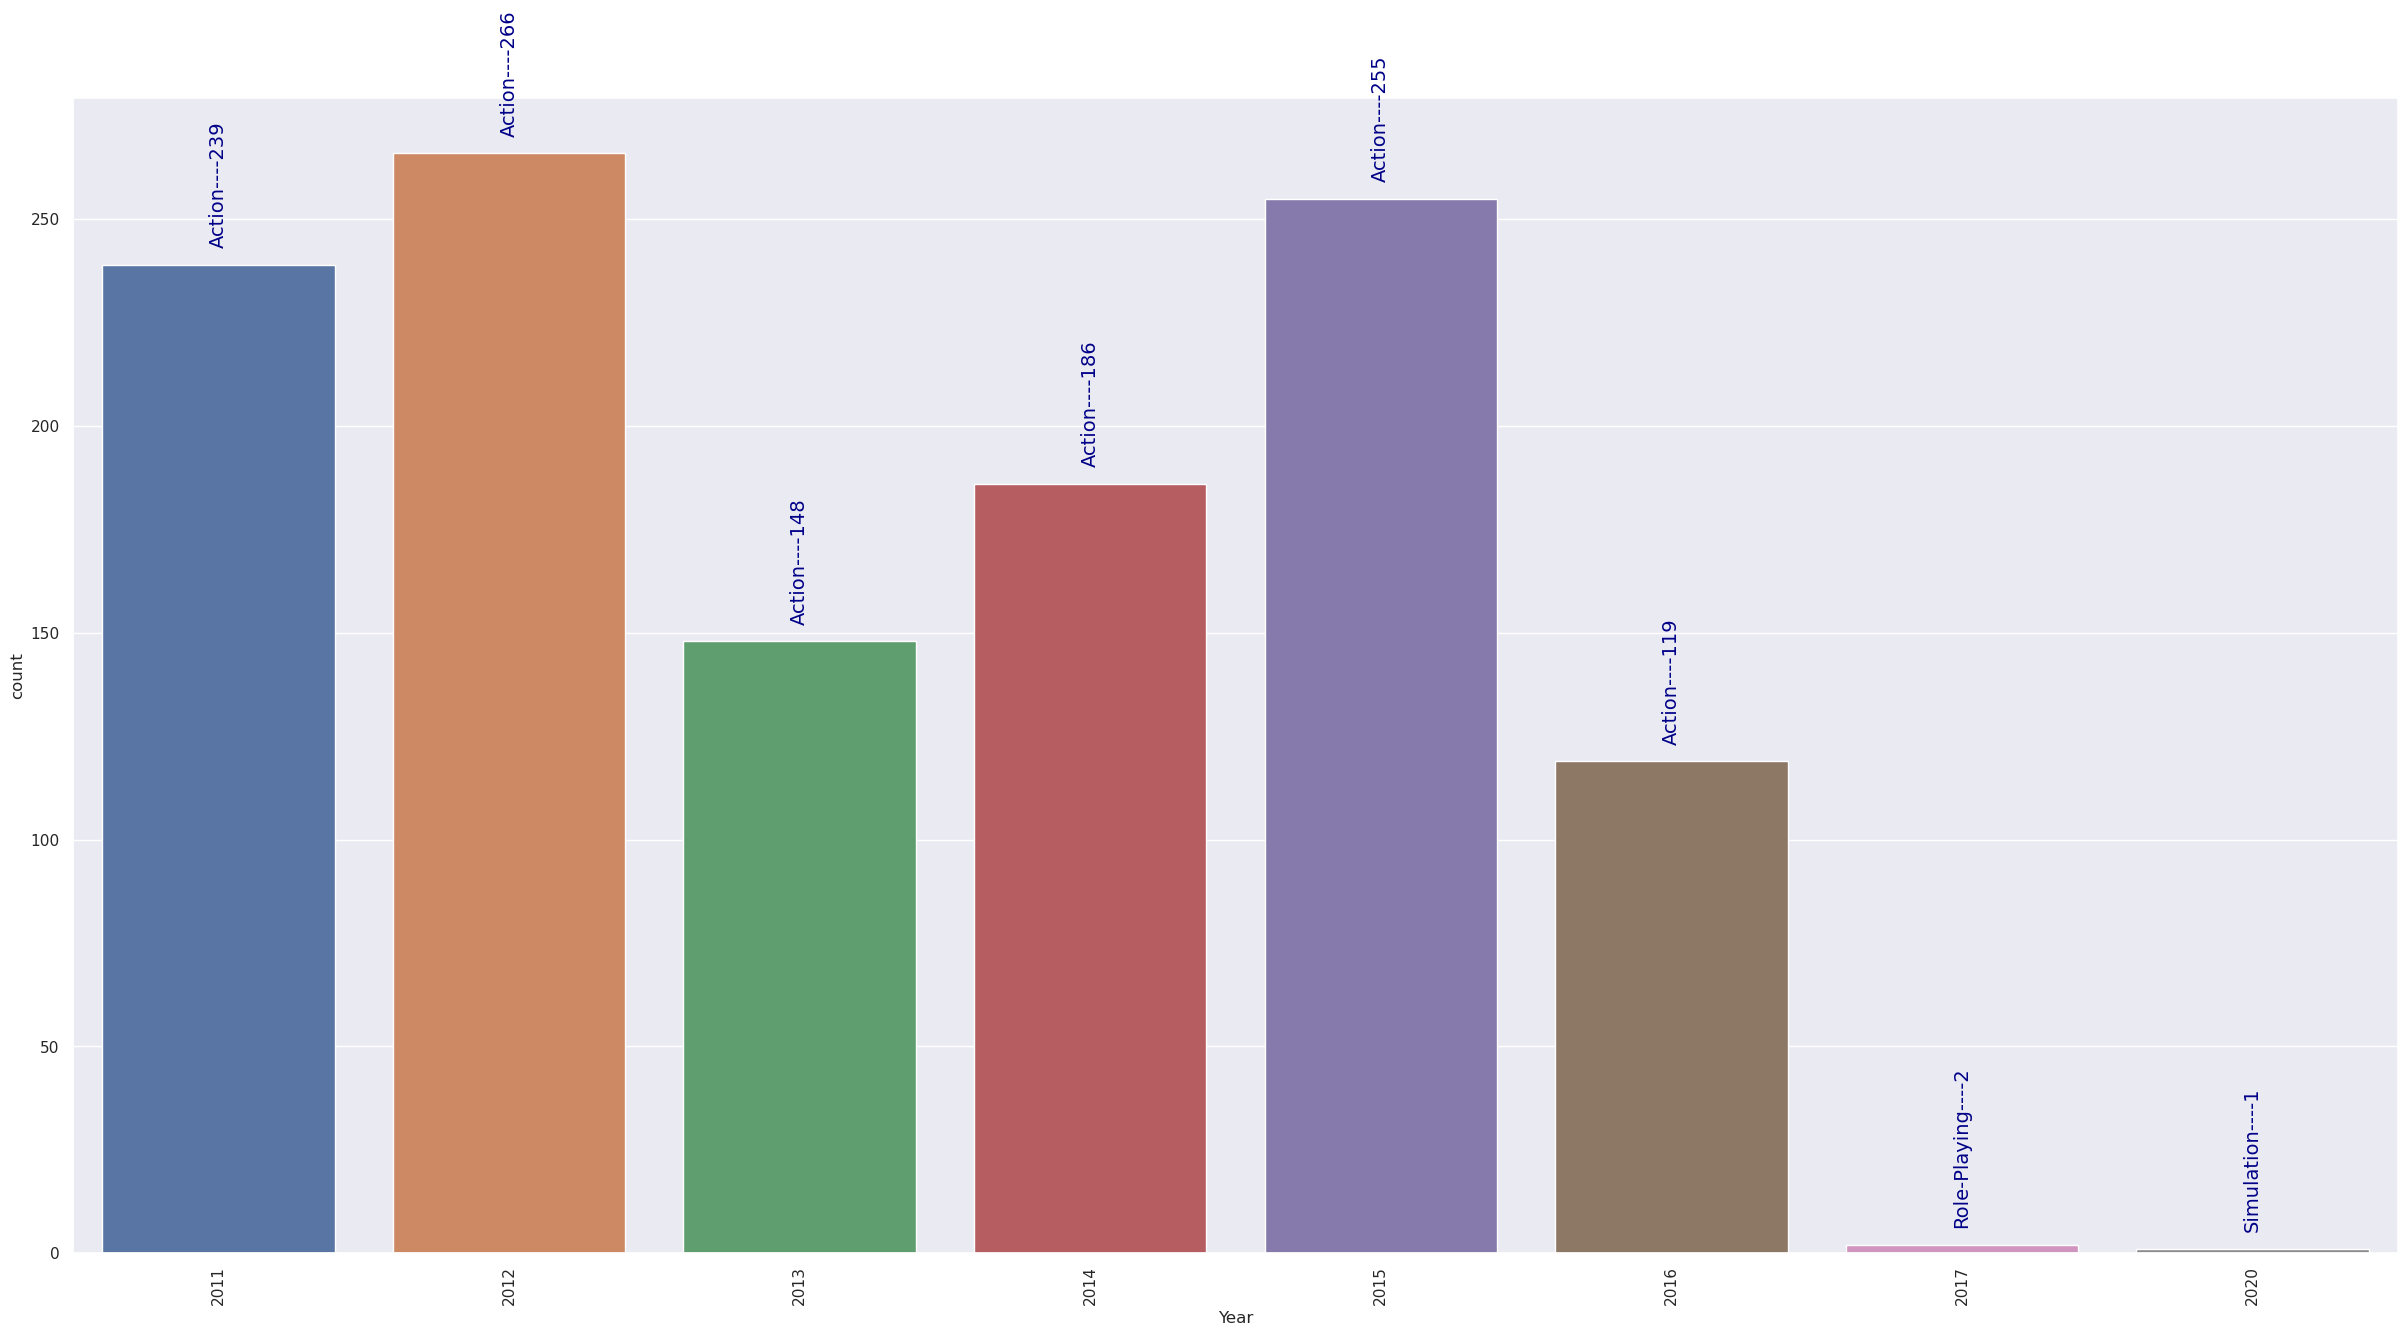

In [17]:
year_max_df = recent_game.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#008', size=14, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=90)
plt.show()

How about the sales ?

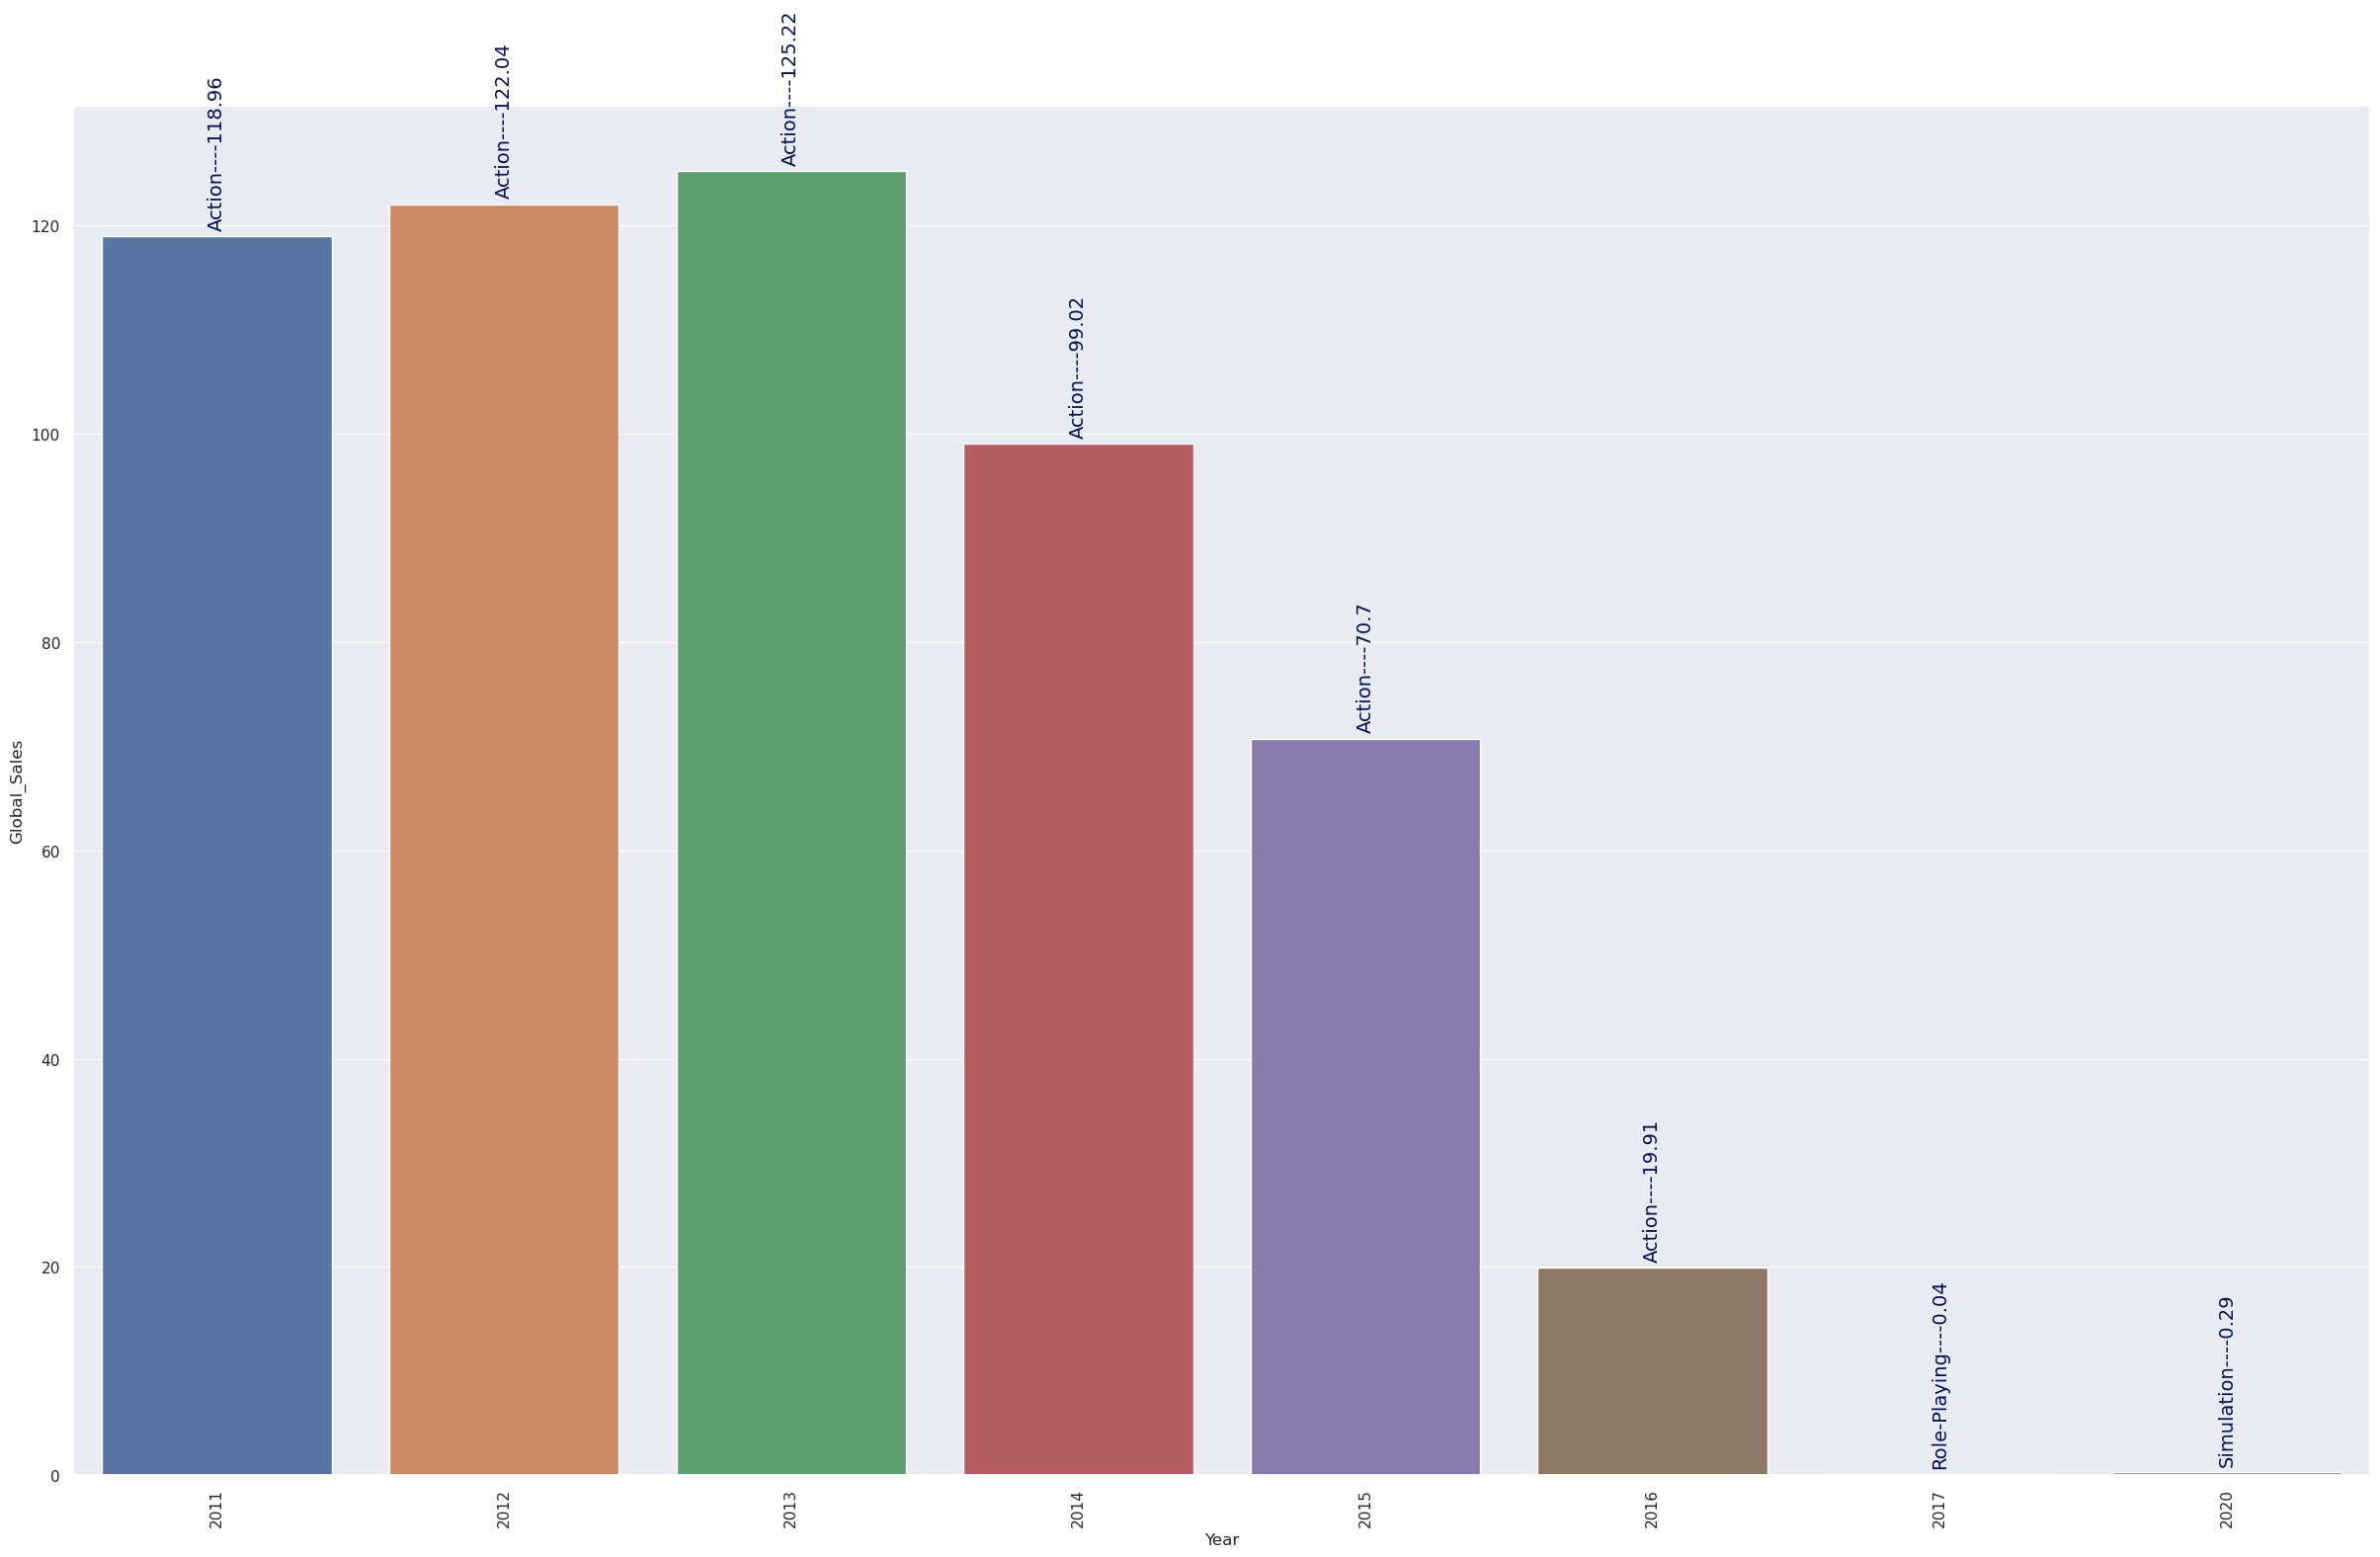

In [18]:
year_sale_dx = recent_game.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#015', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

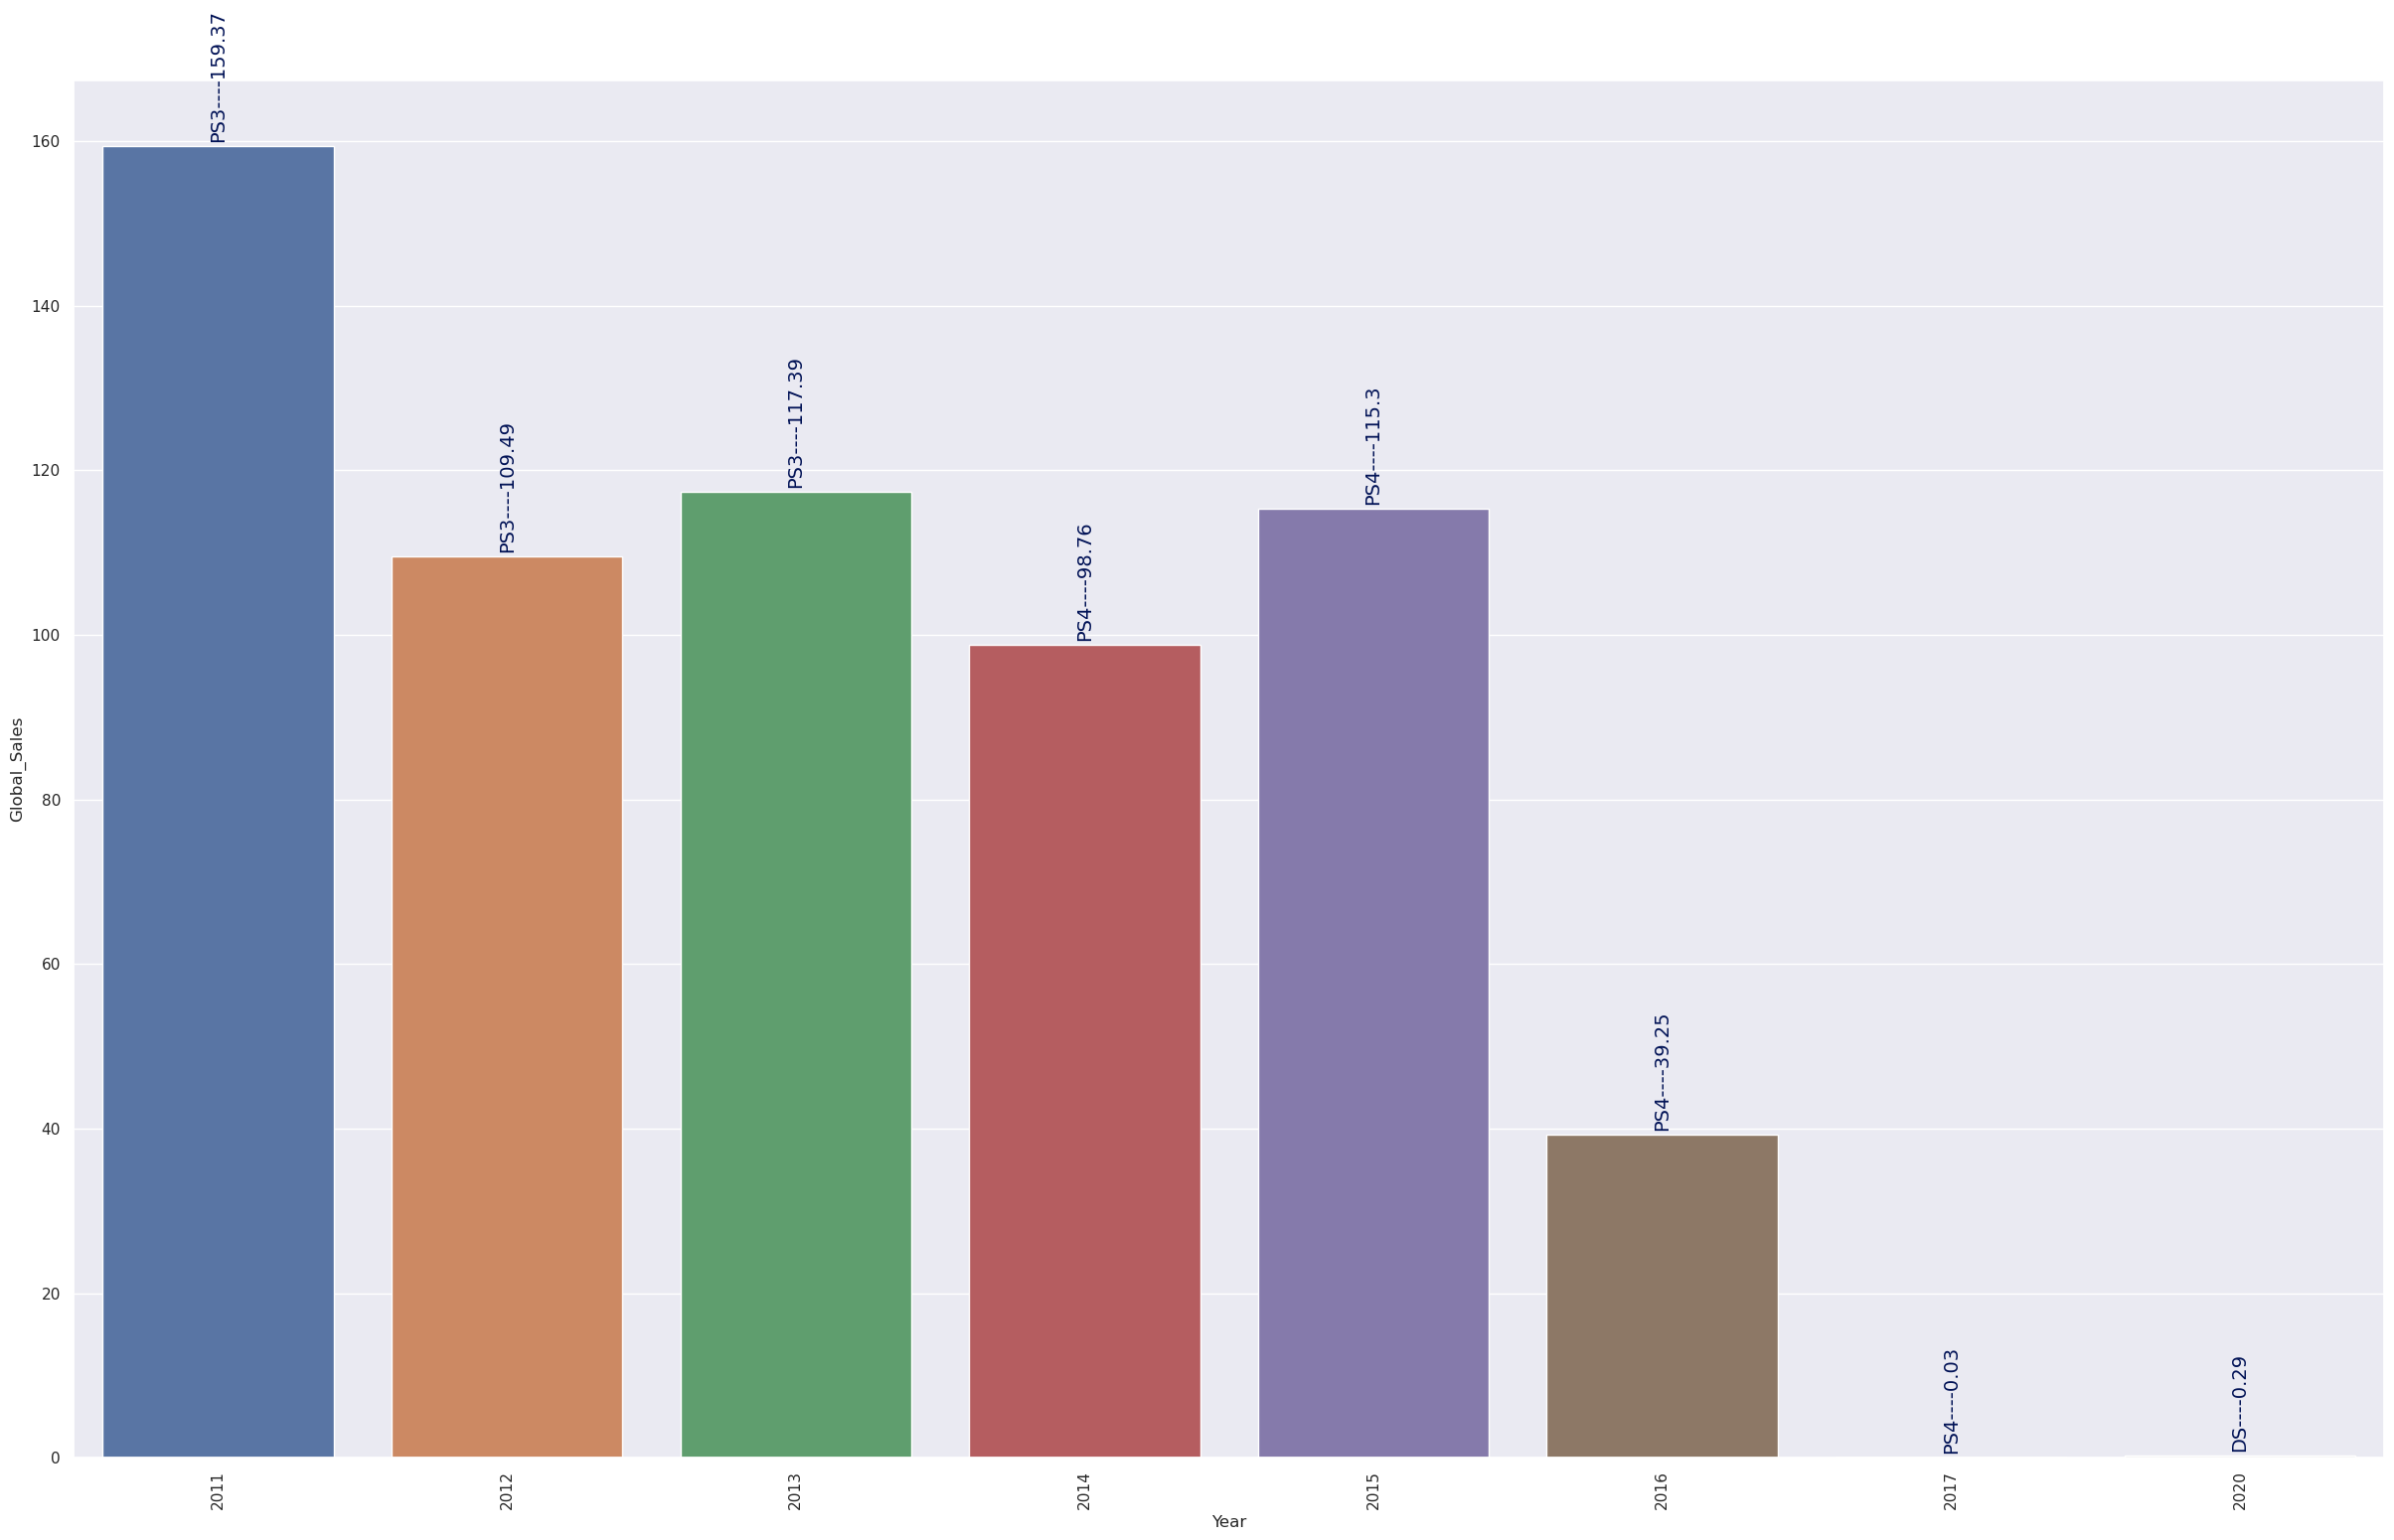

In [19]:
year_sale_dx = recent_game.groupby(by=['Year', 'Platform'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Platform']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#015', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

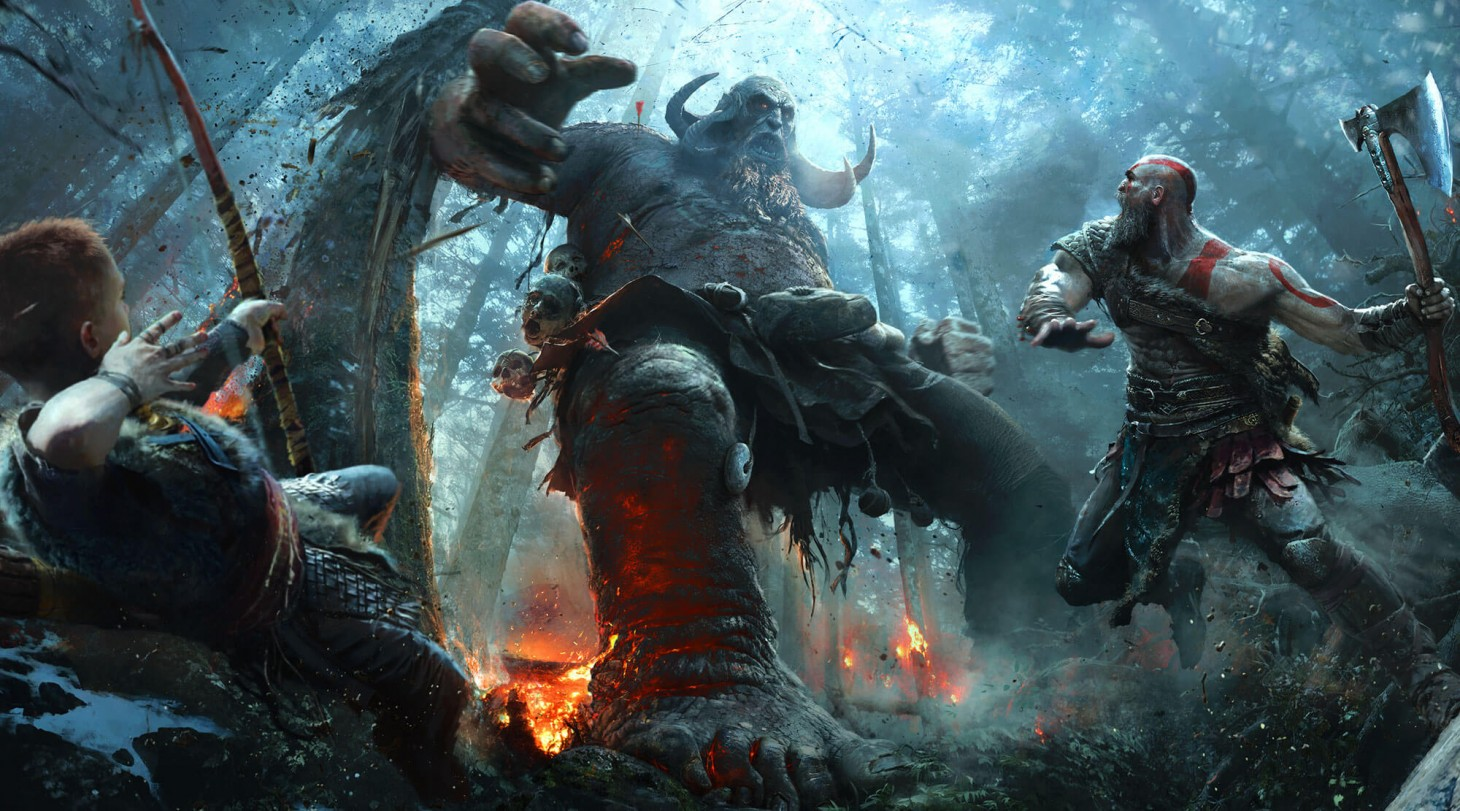

In [20]:
Image('/kaggle/input/actionpict/gow.jpg')

As we observe above, genres may accumulate tons of revenue in some regions but may not consider as much as enjoyable for people in other places. Let's investigate whether regions and genres have any possible correlations.

In [21]:
fig = px.imshow(recent_game.groupby('Genre').agg({'NA_Sales':'sum', 'EU_Sales':'sum',\
                                                 'JP_Sales':'sum','Other_Sales':'sum'\
                                                }).T)
fig.update_layout(title="Sales distribution by genre and region (Millions) last four years")
fig.show()

Let's observe what gaming genres that is popular in North America market comparing to the global market.

In [22]:
na_sales_genre_ols = pd.DataFrame(ols('NA_Sales ~ Genre',recent_game).fit().params).sort_values(0, ascending=False)
print("NA:", na_sales_genre_ols)
print()
glob_sales_genre_ols = pd.DataFrame(ols('Global_Sales ~ Genre',recent_game).fit().params).sort_values(0, ascending=False)
print("Global:", glob_sales_genre_ols)

NA:                               0
Genre[T.Shooter]       0.400311
Intercept              0.187364
Genre[T.Platform]      0.131886
Genre[T.Sports]        0.088365
Genre[T.Fighting]      0.013209
Genre[T.Misc]          0.006807
Genre[T.Racing]       -0.010189
Genre[T.Role-Playing] -0.013694
Genre[T.Simulation]   -0.066583
Genre[T.Strategy]     -0.121886
Genre[T.Puzzle]       -0.147364
Genre[T.Adventure]    -0.150500

Global:                               0
Genre[T.Shooter]       0.769482
Intercept              0.457875
Genre[T.Platform]      0.282042
Genre[T.Sports]        0.146995
Genre[T.Role-Playing]  0.059048
Genre[T.Racing]        0.043594
Genre[T.Fighting]     -0.029913
Genre[T.Misc]         -0.067847
Genre[T.Simulation]   -0.073656
Genre[T.Strategy]     -0.266310
Genre[T.Puzzle]       -0.316185
Genre[T.Adventure]    -0.343530


We have already recognized the trend between year and gaming products. Let's dive deep into it.

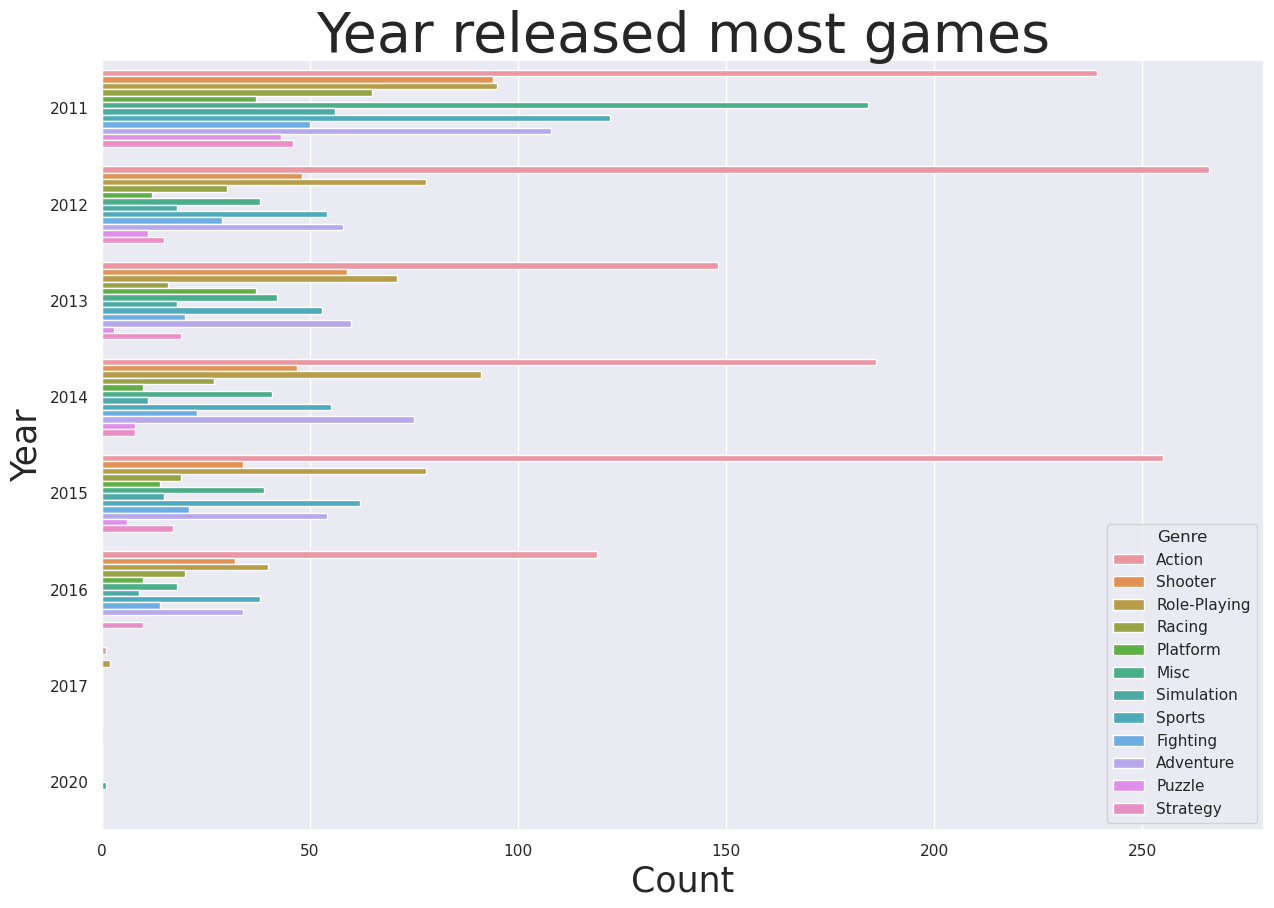

In [23]:
plt.figure(figsize=(15, 10))
sns.color_palette("flare")
sns.set_theme('notebook')

sns.countplot(y="Year",data=recent_game, order = recent_game.groupby\
              (by=['Year'])['Name'].count().index, hue='Genre')

plt.xticks(rotation='horizontal')
plt.title('Year released most games',fontsize=40)    #To adding a title to the data
plt.ylabel('Year',fontsize = 25)                     #To labelling the y-axis by count.
plt.xlabel('Count',fontsize = 25)                      #To labelling the x-axis by year.
plt.show()

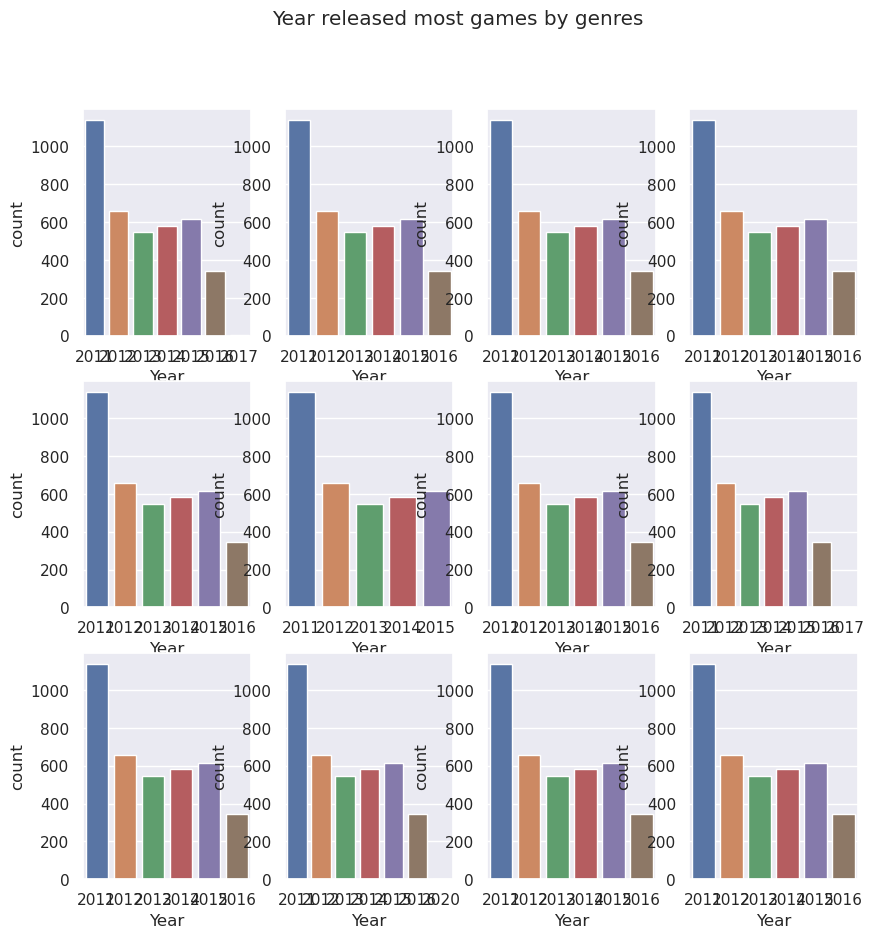

In [24]:
sns.color_palette("Set2")
fig, axes = plt.subplots(3, 4, figsize=(10, 10))

fig.suptitle('Year released most games by genres')

sns.countplot(ax=axes[0, 0], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Action'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[0, 1], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Fighting'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[0, 2], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Adventure'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[0, 3], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Misc'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[1, 0], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Platform'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[1, 1], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Puzzle'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[1, 2], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Racing'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[1, 3], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Role-Playing'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[2, 0], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Shooter'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[2, 1], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Simulation'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[2, 2], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Sports'].groupby(by=['Year'])['Global_Sales'].sum().index)
sns.countplot(ax=axes[2, 3], data=recent_game, x="Year", order = recent_game[recent_game\
            ['Genre']=='Strategy'].groupby(by=['Year'])['Global_Sales'].sum().index)

plt.show()

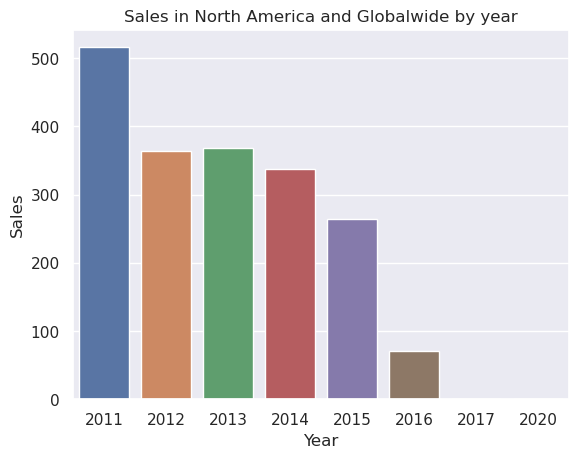

In [25]:
sale_by_yeargame = recent_game.groupby('Year')[['NA_Sales','Global_Sales']].sum()

sns.barplot(x= sale_by_yeargame.index,data=sale_by_yeargame, y='Global_Sales')

plt.title('Sales in North America and Globalwide by year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

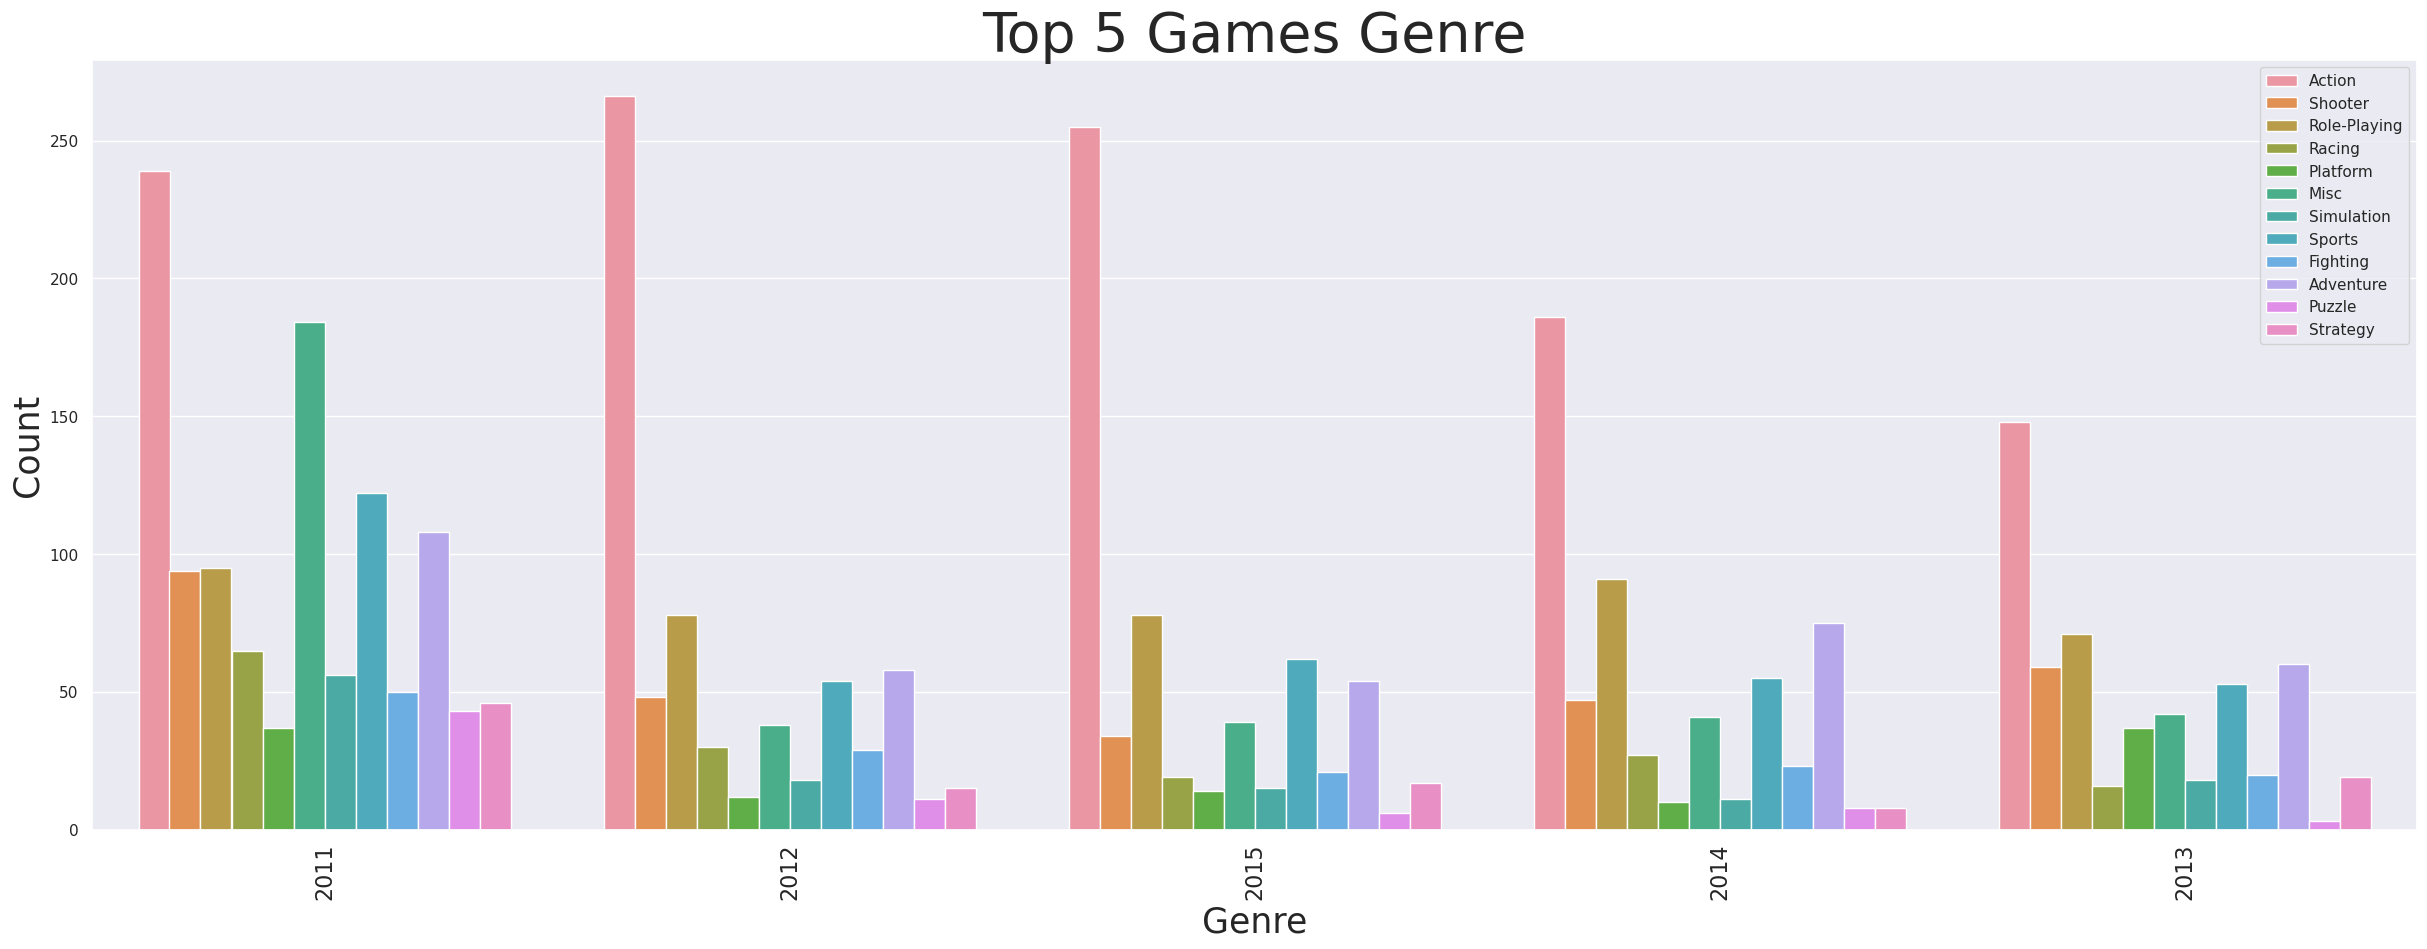

In [26]:
plt.figure(figsize=(30, 10))                            
sns.countplot(x="Year", data=recent_game, hue='Genre', order=recent_game.Year.value_counts().iloc[:5].index)    #iloc is used when we want to loc a range of data from starting to ending point.
plt.xticks(size=16, rotation='vertical')
plt.title('Top 5 Games Genre',fontsize = 40)   #to labelling the data
plt.ylabel('Count',fontsize = 25)              #to labelling the y-axis & aincreasing the size of the font.
plt.xlabel('Genre',fontsize = 25)              #to labelling the x-axis & aincreasing the size of the font.
plt.legend()                                   #the small bar on the left side of the graphs represents the legend i.e by genre.
plt.show()

**Top 5 game publishers in global scale**

                                        Global_Sales  NA_Sales  EU_Sales  \
Publisher                                                                  
Electronic Arts                               279.54    116.47    122.16   
Nintendo                                      239.99     88.50     64.35   
Activision                                    232.26    118.76     82.21   
Ubisoft                                       177.52     81.15     71.98   
Take-Two Interactive                          140.20     74.46     45.54   
Warner Bros. Interactive Entertainment         98.41     48.21     37.02   
Sony Computer Entertainment                    89.45     38.10     32.91   
Namco Bandai Games                             79.66     18.87     17.13   
Microsoft Game Studios                         74.68     44.84     22.94   
Square Enix                                    59.43     18.06     18.90   

                                        JP_Sales  Other_Sales  Name  
Publisher        

<Figure size 1500x1000 with 0 Axes>

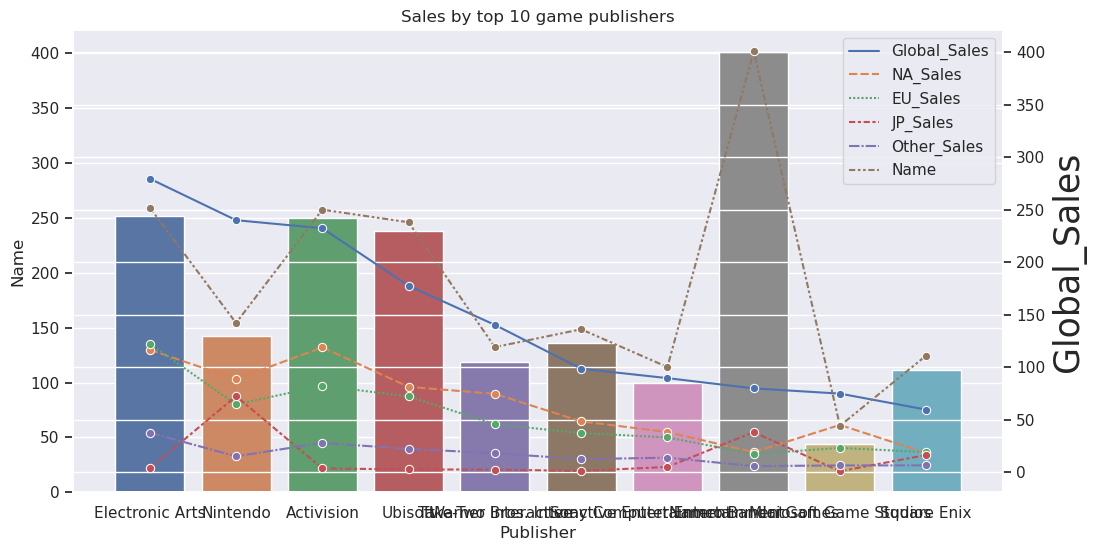

In [27]:
game_by_pub = recent_game.groupby('Publisher').agg({"Global_Sales":"sum", "NA_Sales":"sum",\
                                                    "EU_Sales":"sum", "JP_Sales":"sum",\
                                                    'Other_Sales':"sum", "Name":"count"})\
.sort_values("Global_Sales", ascending=False).head(10)
print(game_by_pub)

#theme
plt.figure(figsize=(15,10))
sns.color_palette("coolwarm")
sns.set_theme('notebook')

#plotting
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data = game_by_pub, x=game_by_pub.index, y='Name', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = game_by_pub, marker='o', sort = False, ax=ax2)

#additional figures
plt.xticks(size=1, rotation=90)
plt.title('Sales by top 10 game publishers')
plt.xlabel('Year', fontsize=25)
plt.ylabel('Global_Sales', fontsize=25)
plt.show()


**Top 5 game publishers in NA market**

Text(0.5, 0, 'Genre')

<Figure size 1500x1000 with 0 Axes>

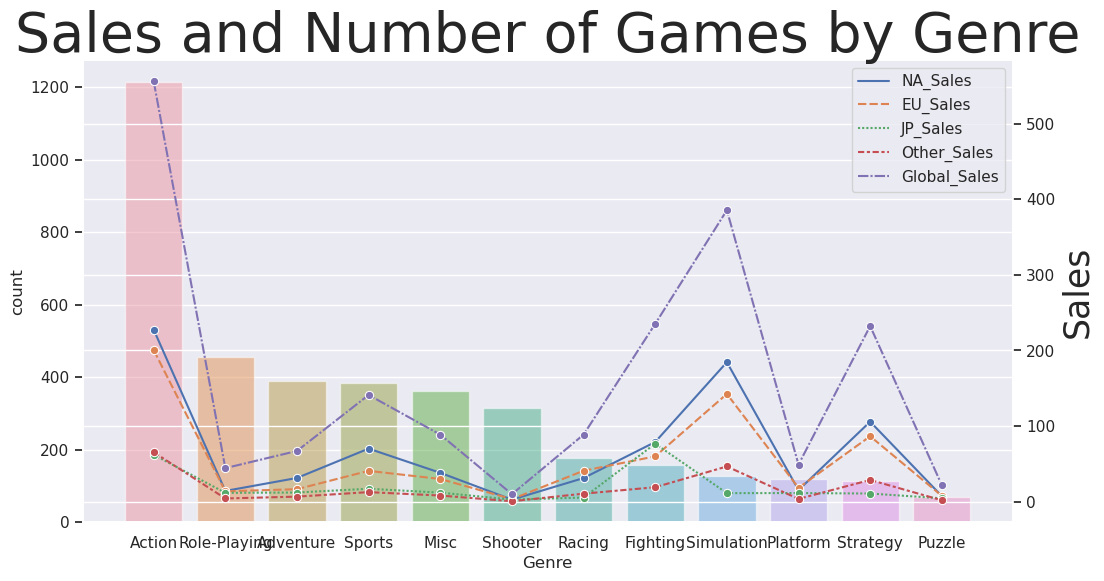

In [28]:

#theme
plt.figure(figsize=(15,10))
sns.color_palette("Paired")
sns.set_theme('notebook')

#count + line plot
fig, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(data = recent_game, x='Genre', order=recent_game['Genre'].value_counts().index,\
              alpha=0.5, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = recent_game[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales',\
                                'Global_Sales']].groupby('Genre').sum(), marker='o', sort = False, ax=ax2)

#additional figures
plt.xticks(rotation=90)
plt.title('Sales and Number of Games by Genre', fontsize=40)
plt.ylabel('Sales', fontsize=25)
plt.xlabel('Genre', fontsize=25)

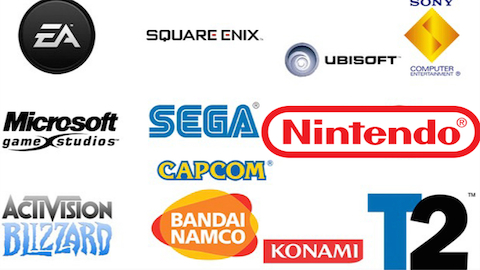

In [29]:
Image("/kaggle/input/top10gamepublisher/VG-RP-Top10-VideoGame-Publishers-480p30_480.jpg")

**Top 5 game platforms**

          Name
Platform      
PS3        705
3DS        500
X360       500
PSV        412
PC         371
PS4        336
PSP        312
XOne       213
Wii        198
DS         189
WiiU       143
PS2          7


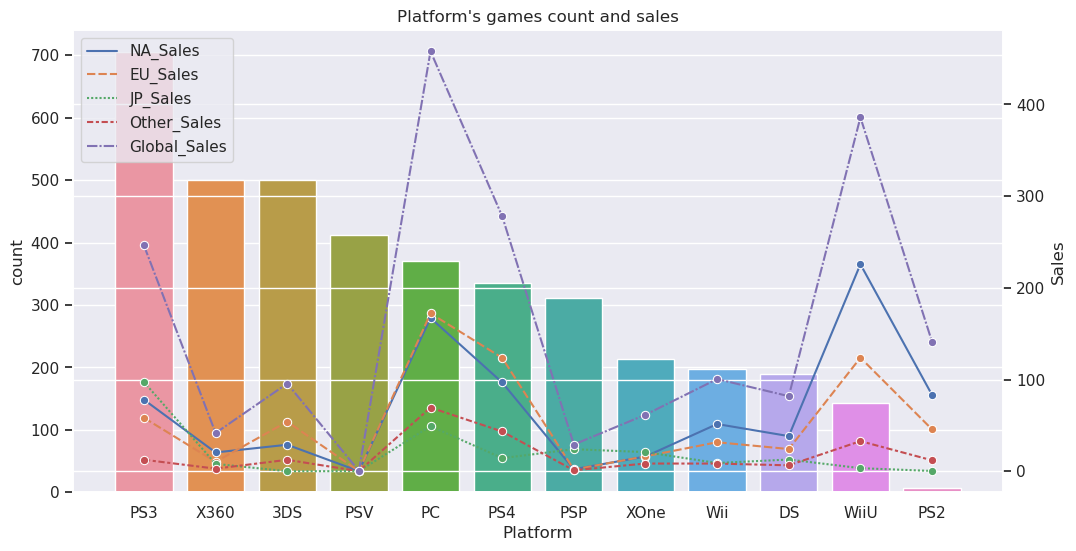

In [30]:
game_per_plat = recent_game.groupby('Platform').agg({"Name":"count"}).sort_values("Name", ascending=False)
print(game_per_plat)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x= game_per_plat.index, data=game_per_plat, y='Name')


sns.countplot(data = recent_game, x=recent_game.index, order=recent_game['Platform'].value_counts().index,\
              alpha=0.5, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = recent_game[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales',\
                                'Global_Sales']].groupby('Platform').sum(), marker='o', sort = False, ax=ax2)



plt.xticks(size=16, rotation='vertical')
plt.title("Platform's games count and sales")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

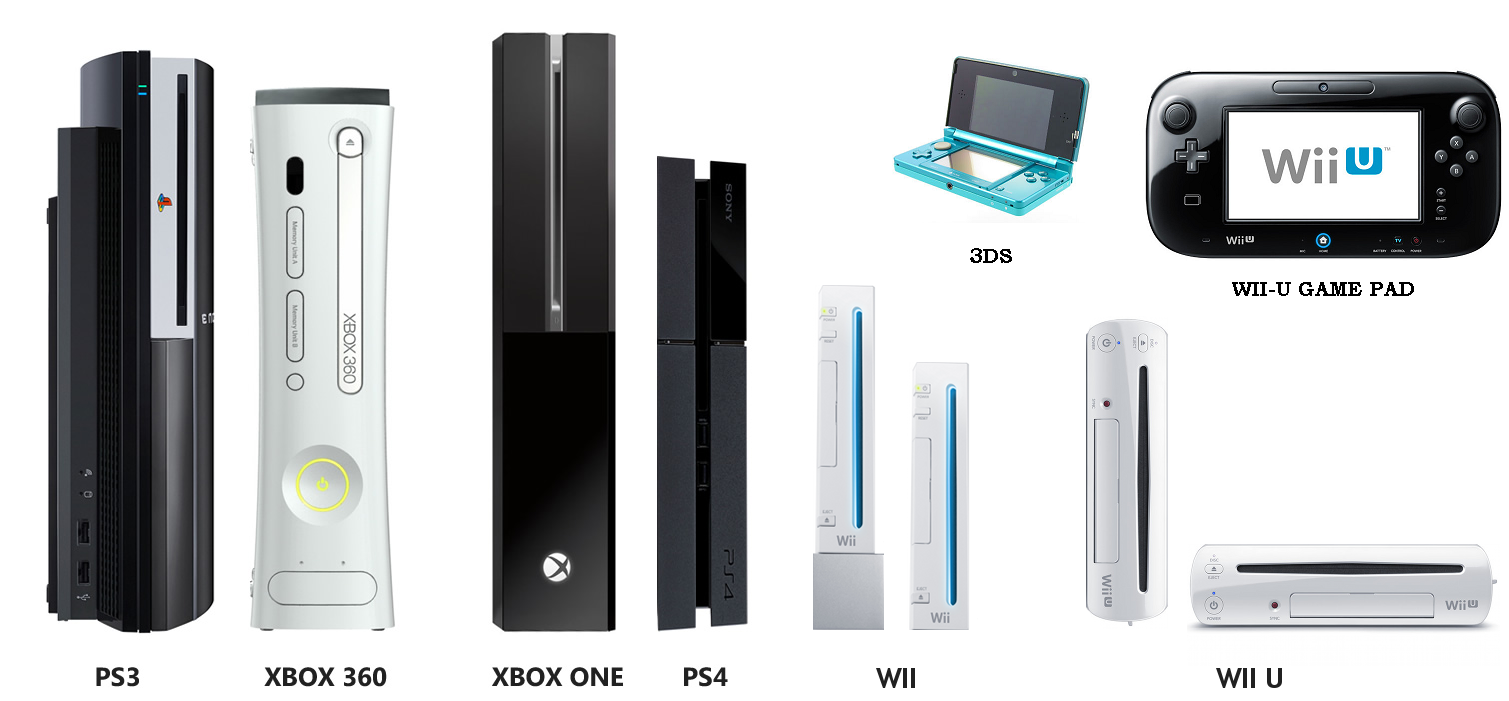

In [31]:
Image("/kaggle/input/consoles/ALL CONSOLES.png")

PC dominance

In [32]:
fig = px.imshow(recent_game.groupby('Platform').agg({'NA_Sales':'sum', 'EU_Sales':'sum',\
                                                 'JP_Sales':'sum','Other_Sales':'sum'\
                                                }).T)
fig.update_layout(title="Sales distribution by platform and region (Millions) last ten years")
fig.show()

Looks like games running on X360 and PS4 are widely enjoyable in all of the markets, especially extremely high correspondence rate in NA markets.

4) PREDICTIVE ANALYSIS

In [33]:
recent_game['Age'] = 2020 - recent_game['Year']


mdl_year_vs_profit = ols("Global_Sales~Age", data=recent_game).fit()
print(mdl_year_vs_profit.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.512
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0337
Time:                        00:33:01   Log-Likelihood:                -6296.9
No. Observations:                3886   AIC:                         1.260e+04
Df Residuals:                    3884   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3237      0.083      3.916      0.0

In [51]:
#data preprocessing
predict_tab = recent_game[['Age','Global_Sales']]
train, test = train_test_split(predict_tab, test_size=0.33, random_state=42)

X_train, y_train = train.iloc[:, :-1].values, train.iloc[:, [-1]].values
X_test, y_test = test.iloc[:, :-1].values, test.iloc[:, [-1]].values

In [72]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mse = MSE(y_test, y_pred)
print('The mean_squared error is:', mse)

The mean_squared error is: 1.6053612842961829


<AxesSubplot:xlabel='Age', ylabel='Global_Sales'>

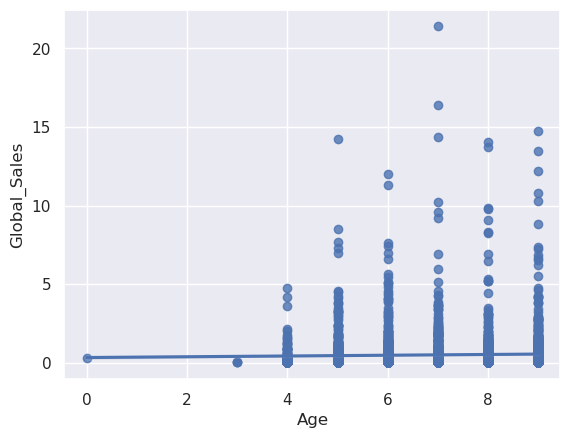

In [48]:
sns.regplot(x="Age", y="Global_Sales", data=recent_game)

Cannot use Linear Regression

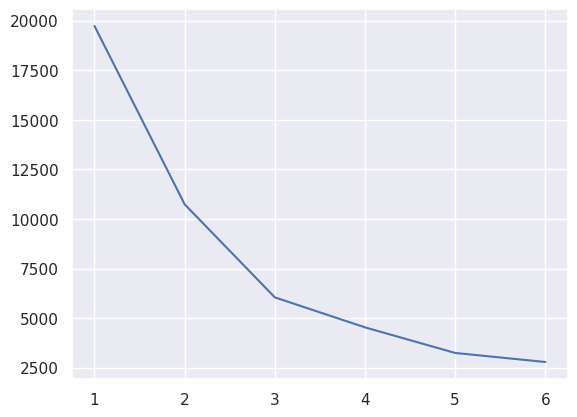

In [60]:
numClusters = [1,2,3,4,5,6]
SSE = []
scaler = StandardScaler()

for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(predict_tab2)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.show()

Elbow at 3 ==> should choose 3 instead.

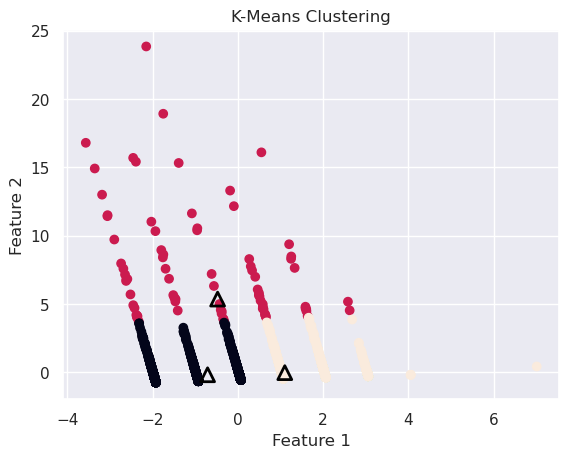

In [105]:
#data preprocessing
predict_tab2 = recent_game[['Age','Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
pca = PCA(n_components=2)
pt2_pca = pca.fit_transform(predict_tab2)

#create the model
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=1) 
scaler = StandardScaler()
pipe = make_pipeline(scaler, k_means)

#perform clustering
pipe.fit(X_train, y_train)
y_pred = pipe.fit_predict(pt2_pca)

# plot the data points and cluster centers
plt.scatter(pt2_pca[:, 0], pt2_pca[:, 1], c=y_pred)
plt.scatter(pipe.named_steps['kmeans'].cluster_centers_[:, 0], pipe.named_steps['kmeans'].cluster_centers_[:, 1],\
            marker='^', s=100, linewidth=2, edgecolors='black', facecolors='none')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()